In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Problem 1


### 1A

In [2]:
data = pd.read_csv("segmentation_data.txt", header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
Sclass = pd.read_csv("segmentation_classes.txt", header = None, sep = '\t')

In [5]:
Sclass.head()

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [6]:
names = pd.read_csv("segmentation_names.txt", header = None)

In [7]:
names.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


In [8]:
min_max_scaler = MinMaxScaler().fit(data)
data_norm = min_max_scaler.transform(data)
data_norm

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])


### 1B

In [9]:
from sklearn.cluster import KMeans 

In [10]:
kMeans = KMeans(n_clusters = 7)

In [11]:
kMeans.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
pd.DataFrame(kMeans.cluster_centers_.T, index = names, columns = ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5',' Cluster 6','Cluster 7'])

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
"(REGION-CENTROID-COL,)",0.769063,0.535099,0.302506,0.254150,0.748274,0.513994,0.251212
"(REGION-CENTROID-ROW,)",0.425930,0.150167,0.530862,0.459382,0.532041,0.808937,0.393366
"(REGION-PIXEL-COUNT,)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(SHORT-LINE-DENSITY-5,)",0.014024,0.027778,0.052260,0.026437,0.039157,0.077441,0.075397
"(SHORT-LINE-DENSITY-2,)",0.022654,0.001667,0.046610,0.013793,0.037651,0.005051,0.019345
"(VEDGE-MEAN,)",0.039702,0.030228,0.100817,0.036790,0.113530,0.054474,0.078009
"(VEDGE-SD,)",0.002983,0.000543,0.009420,0.002031,0.018922,0.001407,0.004436
"(HEDGE-MEAN,)",0.023116,0.026766,0.083972,0.026610,0.107311,0.046335,0.062256
"(HEDGE-SD,)",0.002094,0.000587,0.011043,0.001651,0.017627,0.001401,0.005348
"(INTENSITY-MEAN,)",0.040385,0.823246,0.400608,0.025687,0.298573,0.108790,0.147286


In [13]:
from sklearn import metrics

In [14]:
clusters = kMeans.predict(data)

In [15]:
silhouettes = metrics.silhouette_samples(data, clusters)
print(silhouettes[:20])

[ 0.31132316  0.3421251  -0.09110072  0.21541678  0.35855185  0.12977857
  0.26683371  0.1219922   0.19617831  0.06715959  0.15369884  0.2372328
  0.19161282  0.35829884 -0.15030625  0.25883668  0.13957507 -0.05522165
  0.332067    0.29414435]


In [16]:
print(silhouettes.mean())

0.021044621002874433


The silhouette value is a little low.

In [17]:
from sklearn.metrics import completeness_score, homogeneity_score

In [18]:
c_score = completeness_score(Sclass[1], kMeans.labels_)
print(c_score)

0.6116744999910889


In [19]:
h_score = homogeneity_score(Sclass[1], kMeans.labels_)
print(h_score)

0.609965639314724



### 1C

In [20]:
from sklearn import decomposition

In [38]:
meanVals = np.mean(data_norm, axis=0)
meanRemoved = data_norm - meanVals #remove mean
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2,suppress=True,linewidth=100)
print(covMat)

[[ 0.08  0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.    0.    0.01  0.01 -0.01  0.    0.
   0.01 -0.01  0.  ]
 [ 0.    0.06  0.    0.    0.    0.   -0.    0.   -0.   -0.03 -0.03 -0.03 -0.03  0.02 -0.02  0.02
  -0.03  0.    0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.  ]
 [-0.    0.    0.    0.02 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.
  -0.   -0.    0.  ]
 [-0.    0.    0.   -0.    0.01  0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.
  -0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.01  0.    0.    0.   -0.   -0.    0.   -0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.   -0.   -0.    0.    0.   -0.    0.    0.
   0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.    0.    0.01  0.    0.    0.    0.    0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.    0.   

In [39]:
import numpy.linalg as la
eigVals,eigVects = la.eig(np.mat(covMat))

In [40]:
eigValInd = np.argsort(eigVals)  #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]   #reverse
sortedEigVals = eigVals[eigValInd]
print (sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print(varPercentage)

[0.48 0.1  0.08 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[60.71 13.2  10.12  4.54  3.55  1.99  1.89  1.62  1.07  0.71  0.39  0.16  0.05  0.    0.    0.
  0.    0.    0.  ]


In [41]:
pca = decomposition.PCA(n_components = 6)
DTtrans = pca.fit(data_norm).transform(data_norm)
np.set_printoptions(precision = 2, suppress = True)

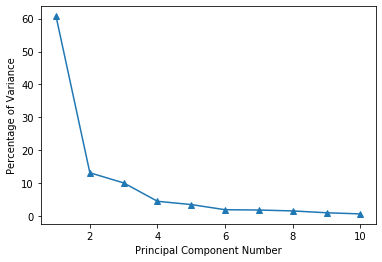

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), varPercentage[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [43]:
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02]


Explains exactly 95% of the variance.

In [46]:
print(DTtrans)

[[-0.69  0.53  0.25 -0.2  -0.08  0.05]
 [-0.67  0.51  0.34 -0.17 -0.04  0.06]
 [-0.71  0.77 -0.16 -0.01 -0.17  0.04]
 ...
 [-0.51 -0.13 -0.08  0.1  -0.03 -0.03]
 [-0.48 -0.09 -0.16  0.11  0.   -0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02 -0.21]]



### 1D

In [48]:
kMeans.fit(DTtrans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
pd.DataFrame(kMeans.cluster_centers_.T, index = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'], columns = ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5',' Cluster 6','Cluster 7'])

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
PC 1,-0.506688,1.414527,-0.619319,0.183625,-0.600021,0.438137,-0.204103
PC 2,-0.066909,0.087223,0.637619,0.046328,-0.355050,-0.105548,-0.239871
PC 3,-0.343612,0.036765,0.195135,-0.266256,0.109851,0.165439,0.147865
PC 4,-0.067623,-0.173195,-0.085205,0.186787,-0.127685,0.234038,0.059405
PC 5,0.074158,-0.029922,-0.064244,0.025414,-0.129916,-0.046427,0.134336
PC 6,0.009007,-0.008973,0.009114,0.020273,-0.016850,-0.006503,-0.008288


In [51]:
clusters = kMeans.predict(DTtrans)
silhouettes = metrics.silhouette_samples(DTtrans, clusters)
print(silhouettes[:20])

[0.61 0.59 0.5  0.54 0.61 0.61 0.59 0.44 0.56 0.49 0.52 0.54 0.61 0.59 0.41 0.56 0.58 0.45 0.43
 0.46]


In [52]:
print(silhouettes.mean())

0.3762543206963316


In [53]:
c_score = completeness_score(Sclass[1], kMeans.labels_)
print(c_score)

0.6099679061860668


In [54]:
h_score = homogeneity_score(Sclass[1], kMeans.labels_)
print(h_score)

0.6083299572676167


With the silhouette value being significantly higher and the completness and homogenity scores being just slightly lower but alomost the same, we can conclude that transforming the data will improve our model.


# Problem 2


### 2A

In [140]:
from numpy import *
from numpy import linalg as la
import numpy as np


def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)


def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

def recommend(dataMat, user, N=3, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

# This function performs evaluation on a single user based on the test_ratio
# For example, with test_ratio = 0.2, a randomly selected 20 percent of rated 
# items by the user are withheld as test data. The remaining part of the user
# profile is used as input for the estimation functions to predict the 
# withheld ratings and compute the error for this user

def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
	dataMat = np.array(dataMat)
	number_of_items = np.shape(dataMat)[1]
	rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
	test_size = int(test_ratio * len(rated_items_by_user))
	test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
	withheld_items = rated_items_by_user[test_indices]
	original_user_profile = np.copy(dataMat[user])
	dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
	error_u = 0.0
	count_u = len(withheld_items)

	# Compute absolute error for user u over all test items
	for item in withheld_items:
		# Estimate rating on the withheld item
		estimatedScore = estMethod(dataMat, user, simMeas, item)
		error_u = error_u + abs(estimatedScore - original_user_profile[item])	
	
	# Now restore ratings of the withheld items to the user profile
	for item in withheld_items:
		dataMat[user, item] = original_user_profile[item]
		
	# Return sum of absolute errors and the count of test cases for this user
	# Note that these will have to be accumulated for each user to compute MAE
	return error_u, count_u
	
def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    # Write this function to iterate over all users and for each perform evaluation by calling
	# the above cross_validate_user function on each user. MAE will be the ratio of total error 
	# across all test cases to the total number of test cases, across all users
    MAE=0
    totCount = 0
    totError = 0
    length=len(dataMat)
    
    for user in range(length):
        err_u , rateCount_u = cross_validate_user(dataMat, user, test_ratio, estMethod, simMeas)
        totCount += rateCount_u    
        totError += err_u
        MAE = totError/totCount

    return MAE

def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
    


def load_jokes(file):
    jokes = np.genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes

def get_joke_text(jokes, id):
    return jokes[id]


IndentationError: expected an indented block (<ipython-input-140-0467a0fe3012>, line 123)

In [77]:
joke = load_jokes("jokes.csv")

In [81]:
modified_jester = np.genfromtxt('modified_jester_data.csv', delimiter = ',')

In [82]:
print(modified_jester)

[[ 3.18 19.79  1.34 ...  0.    0.    0.  ]
 [15.08 10.71 17.36 ... 11.34  6.68 12.07]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [16.58 16.63 15.85 ...  0.    0.    0.  ]
 [ 3.67  4.45  3.67 ...  3.77  3.77  3.28]
 [ 9.88 11.73  9.16 ...  0.    0.    0.  ]]


In [94]:
modified_jester=np.asmatrix(modified_jester)
standRec = recommend(modified_jester, user=4, N=5)

In [95]:
print(standRec)

[(71, 14.413443009309447), (75, 14.397311198445264), (79, 14.382511887413443), (78, 14.356160763938075), (72, 14.334361485417928)]


In [96]:
print("Recommended Items for User", 4, ":\n")
for i, p in standRec:
    print(joke[i], "with predicted rating: ", p, "\n")

Recommended Items for User 4 :

On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?" with predicted rating:  14.413443009309447 

There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. The man took a really big drink and

In [97]:
svdRec = recommend(modified_jester, user=4, N=5, estMethod=svdEst)

In [98]:
print(svdRec)

[(79, 14.317465524765913), (78, 14.31483261871697), (72, 14.272992325354503), (71, 14.26813168558082), (74, 14.222727607159861)]


In [99]:
print("Recommended Items for User", 4, ":\n")
for i, p in svdRec:
    print(joke[i], "with predicted rating: ", p, "\n")

Recommended Items for User 4 :

Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy." with predicted rating:  14.317465524765913 

Q: Ever wonder why the IRS calls it Form 1040?A: Because for every $50 that you earn you get 10 and they get 40. with predicted rating:  14.31483261871697 

Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference. with predicted rating:  14.272992325354503 

On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students 

In [100]:
standRec = recommend(modified_jester, user=10, N=5)

In [101]:
print(standRec)

[(71, 15.001861407344624), (25, 15.00122961286275), (53, 14.996450045612534), (41, 14.991542059358627), (64, 14.98131102986461)]


In [102]:
print("Recommended Items for User", 10, ":\n")
for i, p in standRec:
    print(joke[i], "with predicted rating: ", p, "\n")

Recommended Items for User 10 :

On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?" with predicted rating:  15.001861407344624 

A guy walks into a bar and sits down next to an extremely gorgeous woman.  The first thing he notices about her though are her pants.  They were skin-tight high-waisted and had no obvious mechanism (zipper buttons or velcro) for opening them.After several minutes of puzzling over how she got the pants up over her hips he finally worked up the nerve to ask her.  "Excuse me miss but how do you get int

In [103]:
svdRec = recommend(modified_jester, user=10, N=5, estMethod=svdEst)

In [104]:
print(svdRec)

[(51, 15.407899982647054), (13, 15.394990742479857), (11, 15.39274432639305), (38, 15.388365440049217), (5, 15.382141649699708)]


In [105]:
print("Recommended Items for User", 10, ":\n")
for i, p in standRec:
    print(joke[i], "with predicted rating: ", p, "\n")

Recommended Items for User 10 :

On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?" with predicted rating:  15.001861407344624 

A guy walks into a bar and sits down next to an extremely gorgeous woman.  The first thing he notices about her though are her pants.  They were skin-tight high-waisted and had no obvious mechanism (zipper buttons or velcro) for opening them.After several minutes of puzzling over how she got the pants up over her hips he finally worked up the nerve to ask her.  "Excuse me miss but how do you get int


### 2B

In [130]:
mae=test(modified_jester, 0.2, standEst)

In [131]:
print(mae)

3.715989602469961


In [132]:
mae2=test(modified_jester, 0.2, svdEst)

In [133]:
print(mae2)

3.6284149624318607



### 2C